# This notebook:
- **explores** correct responses for questions (or items) by question item between test types (state and national)
- **visualizes** differences between the rate of correct responses by item at the state and national levels
- **models** if there is a statistical difference between the mean correct response rate by item at the state and national levels using t test confidence interval and hypothesis testing
- **concludes** 
    - the average rate of correct responses by item do not differ between the fl state k-5 and national k-5 levels
    - and while the result is expected since the same questions are being used between fl and national tests,
    - **the insight is item level difficulty (measured by rate of correct responses per item) is comparable between florida and national test results**

*Note* this is a complementary notebook to [Final-Response-Rates-By-Test-Type]() which explores the mean response rates by test type, or state and national, and not the mean response rate of individual items by test type

# 0. Load libaries

In [25]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import statsmodels.stats.api as sm

# 1. Load and prep data

In [6]:
df = pd.read_excel('Data/Quiz_Item_Responses.xlsx') 
df.head()

,Item_ID,score_outcome,number_of_responses
0,FL01M_CC_L01_01,INCORRECT,81
1,FL01M_CC_L01_01,CORRECT,799
2,FL01M_CC_L01_02,INCORRECT,70
3,FL01M_CC_L01_02,CORRECT,810
4,FL01M_CC_L01_03,INCORRECT,141


In [7]:
# group by Item_ID and aggregate the sum of number of responses
# add new variable percent_score_outcome_of_total_response, or number of responses / total responses
# filter where score_outcome is correct
groupby = (df.groupby(['Item_ID'])
           .agg({'number_of_responses': 'sum'})
           .rename(columns={'number_of_responses': 'total_responses'}))
df = df.join(groupby, on='Item_ID')
df["perc_outcome_of_total_response_per_item_id"]= df["number_of_responses"]/df["total_responses"]*100
df.head(10)

,Item_ID,score_outcome,number_of_responses,total_responses,perc_outcome_of_total_response_per_item_id
0,FL01M_CC_L01_01,INCORRECT,81,880,9.204545
1,FL01M_CC_L01_01,CORRECT,799,880,90.795455
2,FL01M_CC_L01_02,INCORRECT,70,880,7.954545
3,FL01M_CC_L01_02,CORRECT,810,880,92.045455
4,FL01M_CC_L01_03,INCORRECT,141,880,16.022727
5,FL01M_CC_L01_03,CORRECT,739,880,83.977273
6,FL01M_CC_L01_04,INCORRECT,103,879,11.717861
7,FL01M_CC_L01_04,CORRECT,776,879,88.282139
8,FL01M_CC_L01_05,INCORRECT,97,879,11.035267
9,FL01M_CC_L01_05,CORRECT,782,879,88.964733


In [8]:
# split item id into parts
df[["Item_1","Item_2","Item_3","Item_4","Item_5"]]= df["Item_ID"].str.split("_", expand = True)
df.head(10)

,Item_ID,score_outcome,number_of_responses,total_responses,perc_outcome_of_total_response_per_item_id,Item_1,Item_2,Item_3,Item_4,Item_5
0,FL01M_CC_L01_01,INCORRECT,81,880,9.204545,FL01M,CC,L01,01,None
1,FL01M_CC_L01_01,CORRECT,799,880,90.795455,FL01M,CC,L01,01,None
2,FL01M_CC_L01_02,INCORRECT,70,880,7.954545,FL01M,CC,L01,02,None
3,FL01M_CC_L01_02,CORRECT,810,880,92.045455,FL01M,CC,L01,02,None
4,FL01M_CC_L01_03,INCORRECT,141,880,16.022727,FL01M,CC,L01,03,None
5,FL01M_CC_L01_03,CORRECT,739,880,83.977273,FL01M,CC,L01,03,None
6,FL01M_CC_L01_04,INCORRECT,103,879,11.717861,FL01M,CC,L01,04,None
7,FL01M_CC_L01_04,CORRECT,776,879,88.282139,FL01M,CC,L01,04,None
8,FL01M_CC_L01_05,INCORRECT,97,879,11.035267,FL01M,CC,L01,05,None
9,FL01M_CC_L01_05,CORRECT,782,879,88.964733,FL01M,CC,L01,05,None


In [10]:
# item_1 represents a new category that buckets item_ids, or nests item_ids
# where item_1 = test name  and  item_ID = question
# so the data show the individual questions on a test (and its number of responses)

# Questions:
# What is the average number of correct response on a question by test?
# What is the total number of responses to all questions by test?
# What is the average percent of correct responses by test?

# group by item_1 and average number_of_responses, sum total_responses, and average percent

groupby2 = (df.groupby(['Item_1'])
            .agg({'number_of_responses': 'sum',
                  'total_responses': 'sum',
                  'perc_outcome_of_total_response_per_item_id': 'mean'})
            .rename(columns={'number_of_responses':'total_correct_response_per_item_1',
                         'total_responses':'total_responses_per_item_1',
                         'perc_outcome_of_total_response_per_item_id':'avg_percent_correct_per_item_id_by_item_1'
                        }))
groupby2

,total_correct_response_per_item_1,total_responses_per_item_1,avg_percent_correct_per_item_id_by_item_1
Item_1,,,
FL01M,57048,115153,55.743243
FL02M,40291,87817,50.387597
FL03M,73974,157581,47.920792
FL04M,102038,230340,45.402299
FL05M,74192,174715,45.759369
FL0KM,39432,81433,50.000000
G2,12680,28896,47.872340
G3,3212,7438,45.000000
G4,24395,59288,46.456693


# 2. Visualize data

In [11]:
groupby2.columns

Index(['total_correct_response_per_item_1', 'total_responses_per_item_1',
       'avg_percent_correct_per_item_id_by_item_1'],
      dtype='object')

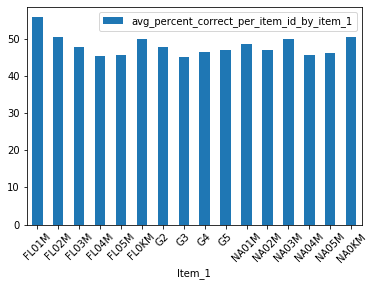

In [12]:
ax = groupby2.plot.bar(y='avg_percent_correct_per_item_id_by_item_1', rot=45) # join.plot(kind='bar'...) also works

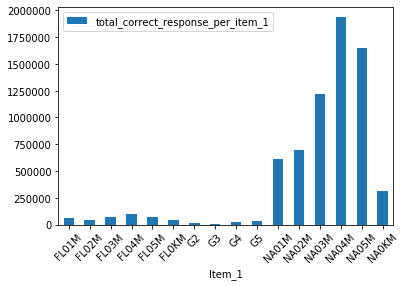

In [13]:
ax = groupby2.plot.bar(y='total_correct_response_per_item_1', rot=45) # x value is index when not specified
                                                                    # optional: join['Item_ID'] = join.index for x

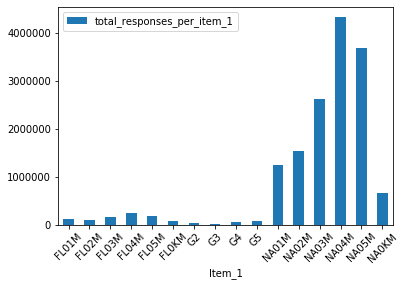

In [14]:
ax = groupby2.plot.bar(y='total_responses_per_item_1', rot=45) 

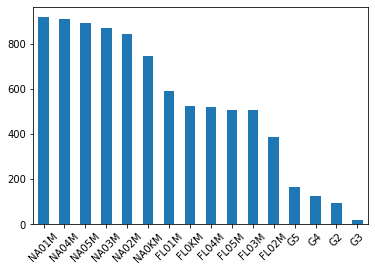

In [15]:
# nsize (number of Item_IDs, or questions) per test
df.Item_1.value_counts().plot(kind='bar', rot=45)

# 3. Model data

## Is there a significant difference (at the alpha=0.05 level) in the mean correct responses per item between the two independent populations (k-5 state tests (FL) and k-5 national test (NA))?

## In other words, does the average rate of correct responses per question differ between K-5 state tests (FL) and K-5 national test (NA)?  Are state tests more difficult to get correct responses than national tests?

Use t test. Note: t test is used for small samples but still robust enough to use and acts more conservation on large samples.

First, understand (sample) population.

Then, run t test.

    Steps:
        1. set up h0 and ha
        2. set up rejection region, tcrit
        3. gather data, calculate tobs
        4. compare tobs to tcrit

Lastly, evaluate confidence interval of difference in the mean between the two independent populations.

## 3.1. Examine n size and normality of sample populations

In [16]:
df=groupby2
df=df.drop(['G2' , 'G3', 'G4', 'G5']) # drop G items from analysis
df['item'] = np.where(df.index.str.contains("FL"), 'FL', 'NA')
df

,total_correct_response_per_item_1,total_responses_per_item_1,avg_percent_correct_per_item_id_by_item_1,item
Item_1,,,,
FL01M,57048,115153,55.743243,FL
FL02M,40291,87817,50.387597,FL
FL03M,73974,157581,47.920792,FL
FL04M,102038,230340,45.402299,FL
FL05M,74192,174715,45.759369,FL
FL0KM,39432,81433,50.000000,FL
NA01M,612590,1238140,48.527808,NA
NA02M,694239,1526738,47.037915,NA
NA03M,1217742,2607759,49.827388,NA


In [18]:
# nsize of avg_percent_correct_per_item_id_by_item_1 by test type (florida vs national)
df.item.value_counts() 

NA    6
FL    6
Name: item, dtype: int64

##### Test for normality

In [19]:
# shapiro normality test
na,fl=df[(df.item=='NA')]['avg_percent_correct_per_item_id_by_item_1'], df[(df.item=='FL')]['avg_percent_correct_per_item_id_by_item_1']
print(stats.shapiro(na)) # outputs t-statistic and pvalue
print(stats.shapiro(fl))

# validity of parametric tests assumes normal distribution
# shapiro test is used to test h0 hypothesis of normality, or
# that sample data is drawn from normal distribution

# if pvalue < 0.05, we reject h0 that sample data is drawn from normal distribution

# in both na and fl correct_perc arrays, the pvalue is greater than alpha > 0.05,
# so we fail to reject the h0 hypothesis 
# and say the sample data is drawn from a normal distribution

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html
# http://www.sthda.com/english/wiki/normality-test-in-r

(0.9307220578193665, 0.5856895446777344)
(0.9087716341018677, 0.42836472392082214)


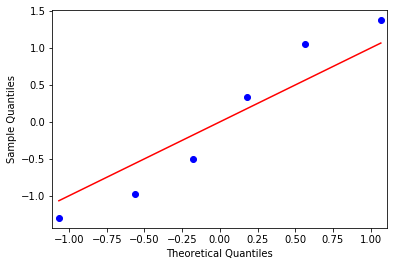

In [22]:
ax = sm.qqplot(na, fit=True, line='s')

# https://stats.stackexchange.com/questions/139708/qq-plot-in-python
# https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html

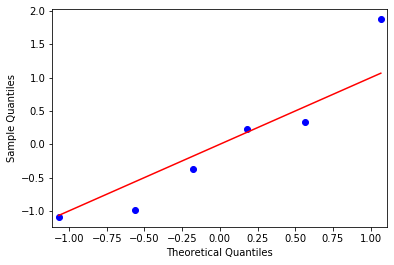

In [23]:
ax = sm.qqplot(fl, fit=True, line='s')

## 3.2 Run ttest

In [27]:
# tcrit, tobs, and tobs pvalue using stats package assuming equal variances

na_n, fl_n= len(na), len(fl)
std_na, std_fl = np.std(na), np.std(fl)
na_mean, fl_mean = np.mean(na), np.mean(fl)
mean_diff = np.subtract(na_mean, fl_mean)

print('National mean of correct response per item: ', na_mean)
print('Florida mean of correct response per item: ', fl_mean)
print('Mean difference between na and fl: ', mean_diff)

dof = ( (std_na**2/na_n) + (std_fl**2/fl_n) ) ** 2 / ( (1/(na_n-1)) * (std_na**2/na_n)**2 ) + ( (1/(fl_n-1)) * (std_fl**2/fl_n)**2 )
dof2 = na_n + fl_n - 2
print ('DF =  %.3f' % dof2) 

tobs, pvalue = stats.ttest_ind(na,fl,equal_var = True)
tcrit = stats.t.ppf(1-0.025, dof2)

print ('tobs = %.3f' % tobs)
print ('pvalue = %.3f' % pvalue)
print ('tcrit = %.3f' % tcrit)

cm = sm.CompareMeans(sm.DescrStatsW(na), sm.DescrStatsW(fl))
print(cm.tconfint_diff(usevar='unequal'))   # 95 % confidence interval 

National mean of correct response per item:  47.92953909101439
Florida mean of correct response per item:  49.20221665142376
Mean difference between na and fl:  -1.2726775604093703
DF =  10.000
tobs = -0.726
pvalue = 0.484
tcrit = 2.228
(-5.362369610248072, 2.817014489429331)


## 3.3 Compare tobs to tcrit

tobs (-0.726) is not greater than tcrit (2.228) 
tobs (-0.726) is not less than -tcrit (-2.228) 

so tobs does not lie in the rejection region.

We fail to reject the null hypothesis and accept that the means of correct responses do not differ between the two indepedent populations (state tests (FL K-5) and national test (NA K-5)), t(10) = -0.726, p>0.05.